In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('./images\leonimessi.jpg')
img.shape

In [4]:
img = cv2.imread('./images\leonimessi.jpg')
img.shape

(600, 1000, 3)

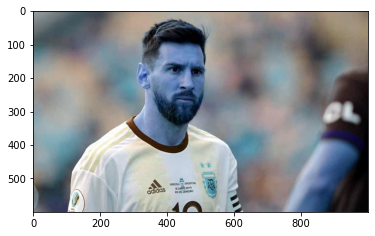

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 1000)

In [7]:
gray

array([[153, 153, 153, ..., 110, 109, 109],
       [153, 153, 153, ..., 110, 110, 109],
       [153, 153, 153, ..., 111, 111, 110],
       ...,
       [134, 133, 133, ...,   6,   6,   6],
       [134, 134, 133, ...,   6,   6,   6],
       [135, 134, 134, ...,   6,   6,   6]], dtype=uint8)

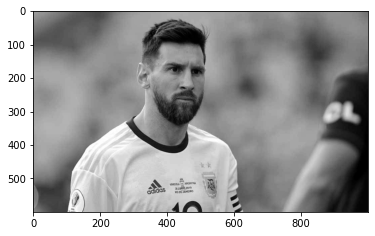

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv\eye_cascade.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[356, 102, 205, 205]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(356, 102, 205, 205)

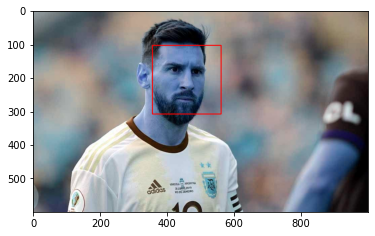

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

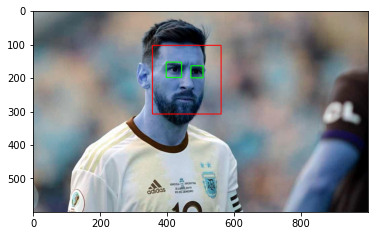

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

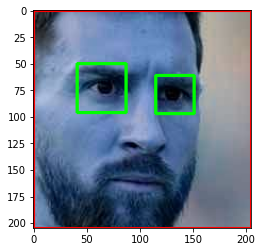

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

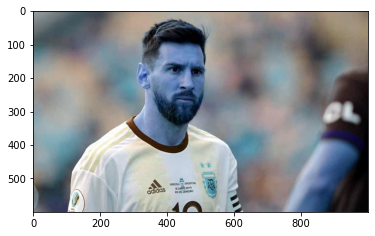

In [15]:
original_image = cv2.imread('./images\leonimessi.jpg')
plt.imshow(original_image)

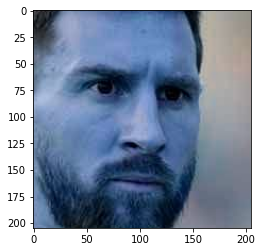

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./images\leonimessi.jpg')
plt.imshow(cropped_image)

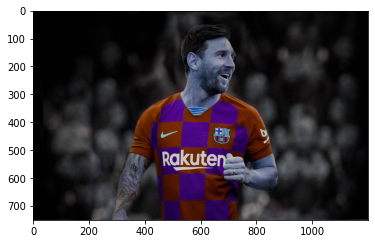

In [17]:
org_image_obstructed = cv2.imread('./images\lm_no.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./images\lm_no.jpg')
cropped_image_no_2_eyes

In [40]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [80]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [81]:
img_dirs

['./dataset/cropped',
 './dataset/hritik_roshan',
 './dataset/lionel_messi',
 './dataset/madhu_bala',
 './dataset/ms_dhoni',
 './dataset/p_chopra',
 './dataset/s_khan',
 './dataset/virat_kohli']

In [82]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

Cropping images section.

In [83]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
hritik_roshan
Generating cropped images in folder:  ./dataset/cropped/hritik_roshan
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
madhu_bala
Generating cropped images in folder:  ./dataset/cropped/madhu_bala
ms_dhoni
Generating cropped images in folder:  ./dataset/cropped/ms_dhoni
p_chopra
Generating cropped images in folder:  ./dataset/cropped/p_chopra
s_khan
Generating cropped images in folder:  ./dataset/cropped/s_khan
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [127]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'hritik_roshan': ['./dataset/cropped/hritik_roshan\\hritik_roshan10.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan11.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan12.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan13.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan14.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan15.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan16.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan17.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan18.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan19.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan2.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan20.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan22.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan23.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan24.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan26.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan27.png'

Py wavelet Transformation.

In [128]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

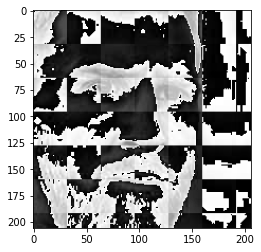

In [129]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [131]:
celebrity_file_names_dict

{'hritik_roshan': ['./dataset/cropped/hritik_roshan\\hritik_roshan10.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan11.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan12.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan13.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan14.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan15.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan16.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan17.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan18.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan19.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan2.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan20.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan22.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan23.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan24.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan26.png',
  './dataset/cropped/hritik_roshan\\hritik_roshan27.png'

In [132]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'hritik_roshan': 0,
 'lionel_messi': 1,
 'madhu_bala': 2,
 'ms_dhoni': 3,
 'p_chopra': 4,
 's_khan': 5,
 'virat_kohli': 6}

In [133]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [134]:
len(X[0])

4096

In [135]:
32*32*3 + 32*32

4096

In [136]:
X[0]

array([[ 77],
       [ 88],
       [ 85],
       ...,
       [125],
       [ 43],
       [242]], dtype=uint8)

In [137]:
y[0]

0

In [138]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(247, 4096)

Data cleaning process is done. Now we are ready to train our model
We will use SVM (Support Vector Machine) with rbf kernel tuned with heuristic finetuning

In [139]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7903225806451613

In [146]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       1.00      0.75      0.86         4
           2       0.82      0.90      0.86        10
           3       1.00      0.64      0.78        11
           4       0.75      0.80      0.77        15
           5       0.67      0.80      0.73        10
           6       1.00      0.80      0.89         5

    accuracy                           0.79        62
   macro avg       0.84      0.79      0.80        62
weighted avg       0.82      0.79      0.79        62



Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [147]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [148]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [149]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.740541   
1        random_forest    0.567568   
2  logistic_regression    0.708108   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}

In [150]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [151]:
best_estimators['svm'].score(X_test,y_test)

0.8225806451612904

In [152]:
best_estimators['random_forest'].score(X_test,y_test)

0.5645161290322581

In [153]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8225806451612904

In [154]:
best_clf = best_estimators['svm']

In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0,  1,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  1,  0,  0],
       [ 0,  0,  0,  8,  1,  2,  0],
       [ 0,  0,  1,  0, 13,  1,  0],
       [ 0,  0,  0,  1,  2,  7,  0],
       [ 1,  0,  0,  0,  0,  0,  4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

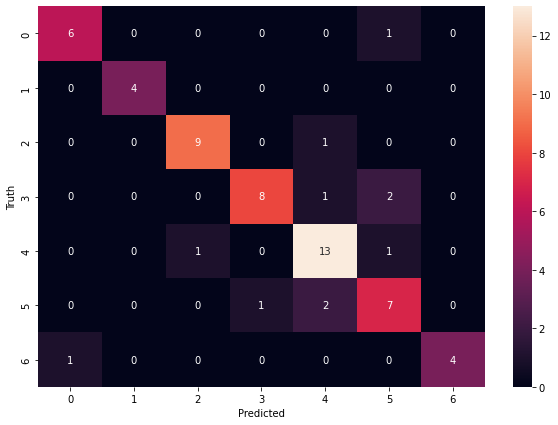

In [156]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [157]:
class_dict

{'hritik_roshan': 0,
 'lionel_messi': 1,
 'madhu_bala': 2,
 'ms_dhoni': 3,
 'p_chopra': 4,
 's_khan': 5,
 'virat_kohli': 6}

Save the trained model

In [158]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

Save class dictionary

In [159]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))